In [1]:
import pandas as pd 
import numpy as np 
import scipy
import matplotlib
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 10

In [3]:
df_Q1_Clean = pd.read_csv('df_Q1_Clean.csv', header=0)
df_Q1_Clean.head()

,identifiant,Arrondissement,Duree
0,3210,13.0,1140.0
1,3232,13.0,1440.0
2,3271,5.0,1440.0
3,3280,5.0,1440.0
4,3277,5.0,1440.0


In [4]:
g_Q1 = df_Q1_Clean.groupby('Arrondissement')
print(g_Q1)

In [5]:
# Somme de duree par arrondissement
df_duree_sum = g_Q1[['Duree']].agg([pd.Series.sum])

# Reset the index and the columns
df_duree_sum = df_duree_sum.reset_index()
df_duree_sum.columns = df_duree_sum.columns.droplevel(1)
df_duree_sum = df_duree_sum.rename(columns={'Duree':'Duree_Sum'})

# Supprimer arrodissement 0
df_duree_sum = df_duree_sum.drop(1, axis=0)
print(df_duree_sum.head())

   Arrondissement  Duree_Sum
0            -1.0     4320.0
2             1.0   657810.0
3             2.0   544920.0
4             3.0   634200.0
5             4.0   714360.0


In [6]:
# Answers
df_Q1_Court = df_duree_sum.sort_values(by='Duree_Sum')
print("les plus courts :", df_Q1_Court)
df_Q1_Long = df_duree_sum.sort_values(by='Duree_Sum', ascending=False)
print("les plus courts :", df_Q1_Long)

les plus courts :     Arrondissement  Duree_Sum
0             -1.0     4320.0
3              2.0   544920.0
22            21.0   551520.0
23            22.0   599040.0
4              3.0   634200.0
..             ...        ...
18            17.0  1834139.0
21            20.0  1910100.0
14            13.0  1924500.0
16            15.0  2152740.0
17            16.0  2505660.0

[23 rows x 2 columns]
les plus courts :     Arrondissement  Duree_Sum
17            16.0  2505660.0
16            15.0  2152740.0
14            13.0  1924500.0
21            20.0  1910100.0
18            17.0  1834139.0
..             ...        ...
4              3.0   634200.0
23            22.0   599040.0
22            21.0   551520.0
3              2.0   544920.0
0             -1.0     4320.0

[23 rows x 2 columns]


<AxesSubplot:xlabel='Arrondissement'>

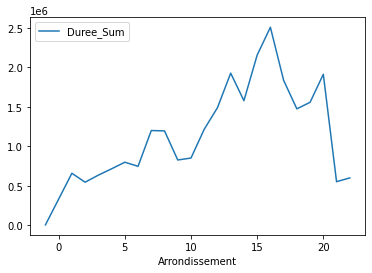

In [7]:
# Table plot
df_duree_sum.plot(x='Arrondissement', y='Duree_Sum')

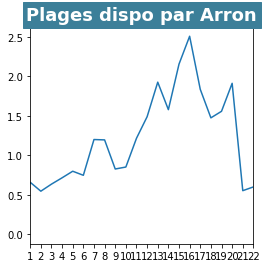

In [8]:
fig=plt.figure(num=1,figsize=(4,4))
ax=fig.add_subplot(111)
ax.plot(df_duree_sum['Arrondissement'], df_duree_sum['Duree_Sum'])
ax.set_xlim(1,7.1)
ax.set_xticks(np.linspace(1,22,22))
ax.set_title("Plages dispo par Arron", fontsize=18, backgroundcolor='#3c7f99', fontweight='bold',color='white',verticalalignment="baseline")
plt.show()
# https://zhuanlan.zhihu.com/p/139052035
# del

In [9]:
# Question 3 : Dans quels mois était plus / moins garé plus longtemps / plus courts ?
# Explorer les colonnes 'Date_du_releve' et 'Derniere_date_edition'
df = pd.read_csv('stationnements.txt', sep='\t', header=0)
df.columns
print(df['Date_du_releve'].value_counts(normalize=True),
      df['Derniere_date_edition'].value_counts(normalize=True))

2020-08-31    0.703254
2018-05-01    0.013854
2020-08-01    0.013074
2020-07-07    0.010049
2020-07-09    0.009610
                ...   
2015-08-02    0.000049
2020-09-04    0.000049
1970-01-23    0.000049
2020-03-02    0.000049
2021-06-01    0.000049
Name: Date_du_releve, Length: 126, dtype: float64 2020-08-24    0.017222
2020-08-14    0.017173
2020-08-20    0.016539
2017-08-17    0.015905
2020-08-28    0.014539
                ...   
2018-12-03    0.000049
2018-12-06    0.000049
2018-12-04    0.000049
2019-09-27    0.000049
2021-04-16    0.000049
Name: Derniere_date_edition, Length: 396, dtype: float64


In [10]:
# Il y 70% de lignes ont '2020-08-31' dans 'Date_du_releve' qui va géner le resultat.
# On va donc prendre la colonne 'Date_du_releve'

In [18]:
# Reprendre df_Q1_Clean et ajouter la colonne 'Date_du_releve'
df_Q1_Clean['Date_du_releve'] = df['Date_du_releve']
df_Q3 = df_Q1_Clean.copy()
print(df_Q3.head())
print(df_Q3.info())

  identifiant  Arrondissement   Duree Date_du_releve
0        3210            13.0  1140.0     2020-08-31
1        3232            13.0  1440.0     2020-07-21
2        3271             5.0  1440.0     2020-08-31
3        3280             5.0  1440.0     2020-08-31
4        3277             5.0  1440.0     2020-08-31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20499 entries, 0 to 20498
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   identifiant     20499 non-null  object 
 1   Arrondissement  20499 non-null  float64
 2   Duree           20499 non-null  float64
 3   Date_du_releve  20499 non-null  object 
dtypes: float64(2), object(2)
memory usage: 640.7+ KB
None


In [20]:
# Transférer jour à mois et ajouter la colonne 'Mois'
df_Q3['Mois'] = pd.Series([])
for row in range(0,df_Q3.shape[0]):
    df_Q3['Mois'][row] = df['Date_du_releve'][row][5:7]
df_Q3.head()

c:\users\tf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
c:\users\tf\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,identifiant,Arrondissement,Duree,Date_du_releve,Mois
0,3210,13.0,1140.0,2020-08-31,8.0
1,3232,13.0,1440.0,2020-07-21,7.0
2,3271,5.0,1440.0,2020-08-31,8.0
3,3280,5.0,1440.0,2020-08-31,8.0
4,3277,5.0,1440.0,2020-08-31,8.0


In [22]:
df_Q3_Clean = df_Q2.copy()
df_Q3_Clean.to_csv('df_Q3_Clean.csv')